In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import platform
from datetime import datetime,timedelta
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

In [65]:
ap = pd.read_csv(r'C:\Users\kjk42\Documents\python\study\Airplane_Crashes\data\Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [66]:
ap['Date'] = pd.to_datetime(ap['Date'])
ap['year']=ap['Date'].apply(lambda x: x.year)
ap['period']=ap['Date'].apply(lambda x: x.year)//10*10

In [24]:
ap.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
year               0
dtype: int64

In [110]:
ap

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,year,period
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",1908,1900
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,1912,1910
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,1913,1910
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,1913,1910
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,1913,1910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,2009-05-20,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras...",2009,2000
5264,2009-05-26,NaN,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...,2009,2000
5265,2009-06-01,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...,2009,2000
5266,2009-06-07,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...,2009,2000


In [67]:
ap_1_df = ap.groupby(['period','year'],as_index=False).agg(Aboard_sum = ('Aboard','sum'),
                                        Fatalities_sum = ('Fatalities','sum'),
                                        Ground_sum = ('Ground','sum'))

In [68]:
ap_1_df['survivor'] = ap_1_df['Aboard_sum'] - ap_1_df['Fatalities_sum']
ap_1_df['survival rate'] = ap_1_df['survivor']/ap_1_df['Aboard_sum']

In [224]:
ap_1_df

,period,year,Aboard_sum,Fatalities_sum,Ground_sum,survivor,survival rate
0,1900,1908,2.0,1.0,0.0,1.0,0.500000
1,1910,1912,5.0,5.0,0.0,0.0,0.000000
2,1910,1913,51.0,45.0,0.0,6.0,0.117647
3,1910,1915,60.0,40.0,0.0,20.0,0.333333
4,1910,1916,109.0,108.0,0.0,1.0,0.009174
...,...,...,...,...,...,...,...
93,2000,2005,2164.0,1306.0,59.0,858.0,0.396488
94,2000,2006,1413.0,1136.0,4.0,277.0,0.196037
95,2000,2007,1364.0,931.0,57.0,433.0,0.317449
96,2000,2008,1463.0,820.0,60.0,643.0,0.439508


<AxesSubplot: xlabel='year', ylabel='Aboard_sum'>

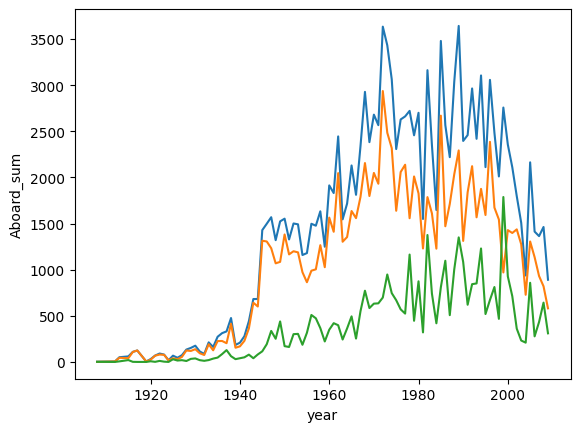

In [229]:
sns.lineplot(data = ap_1_df, x='year', y='Aboard_sum')
sns.lineplot(data = ap_1_df, x='year', y='Fatalities_sum')
sns.lineplot(data = ap_1_df, x='year', y='survivor')

In [73]:
ap_1_df_1 = ap_1_df.groupby(['period'],as_index=False).agg(Aboard_sum = ('Aboard_sum','sum'),
                                                            Fatalities_sum = ('Fatalities_sum','sum'),
                                                            Ground_sum = ('Ground_sum','sum'),
                                                            survivor_sum = ('survivor','sum'))

In [237]:
ap['Summary'] = ap['Summary'].fillna('Unknown',axis=0)

In [240]:
ap_summary_df = ap['Summary']
ap_summary =list(ap['Summary'])
len(ap_summary_df)

5268

In [241]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
stopwords = nltk.corpus.stopwords.words('english')+list(string.punctuation)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kjk42\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjk42\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\kjk42\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [242]:
tags_list = []
for i in ap_summary:
    tokens=[t for t in nltk.word_tokenize(i) if t.lower() not in stopwords]
    tagged_list=nltk.pos_tag(tokens)
    tags=[w.lower() for w, tag in tagged_list
            if tag in ('NN','NNS','NNP','NNPS')]
    tags_list.append(tags)


In [243]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = [" ".join(noun) for noun in tags_list]

tfidf_vectorizer = TfidfVectorizer(min_df = 5, ngram_range=(1,5))
tfidf_vectorizer.fit(text)
vector = tfidf_vectorizer.transform(text).toarray()
len(vector)

5268

In [245]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

pca.fit(vector)
vector_pca = pca.transform(vector)
len(vector_pca)

5268

In [246]:
from sklearn.cluster import KMeans
import numpy as np

kmc = KMeans(n_clusters = 7, random_state = 0)
kmc.fit(vector_pca)

label_kmc = kmc.labels_

In [247]:
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(vector_pca,columns=kmc_columns)
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,label_kmc
0,-0.063956,-0.105508,3
1,-0.009790,-0.052192,6
2,-0.017125,-0.032421,6
3,0.000142,-0.035648,6
4,-0.036578,-0.039018,3


<AxesSubplot: xlabel='kmc_comp1', ylabel='kmc_comp2'>

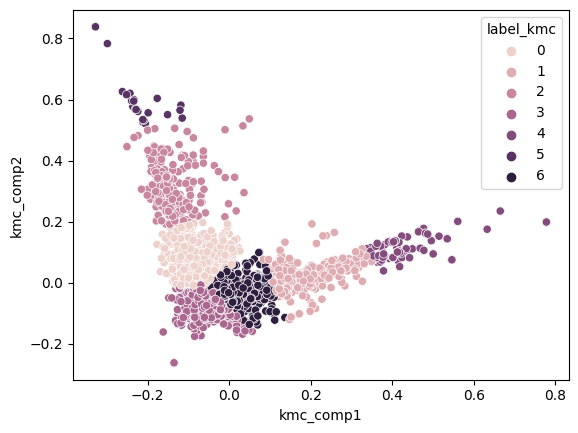

In [248]:
import seaborn as sns
sns.scatterplot(data = X_kmc_df, x = 'kmc_comp1', y = 'kmc_comp2', hue = 'label_kmc')